In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = '../Datasets/heart_failure_clinical_records.csv'
df = pd.read_csv(data)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.0,0,582,1,55,0,543000.00,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.00,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.00,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### No Missing values in the dataset

In [4]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

## EDA

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [6]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
df['DEATH_EVENT'].value_counts(normalize=True)

DEATH_EVENT
0    0.6864
1    0.3136
Name: proportion, dtype: float64

In [8]:
df.groupby('DEATH_EVENT').mean()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,58.316728,0.456002,534.144231,0.443182,40.012529,0.334207,267163.177028,1.156672,137.494172,0.627622,0.308858,158.232809
1,64.605020,0.514668,701.926020,0.431122,32.748724,0.431760,260505.738705,1.834075,135.306760,0.684949,0.318240,70.369260


 Died patients have higher age, serum_creatinine, lower ejection_fraction, and short follow-up(Time) might indicate early death.

## correlation matrix 

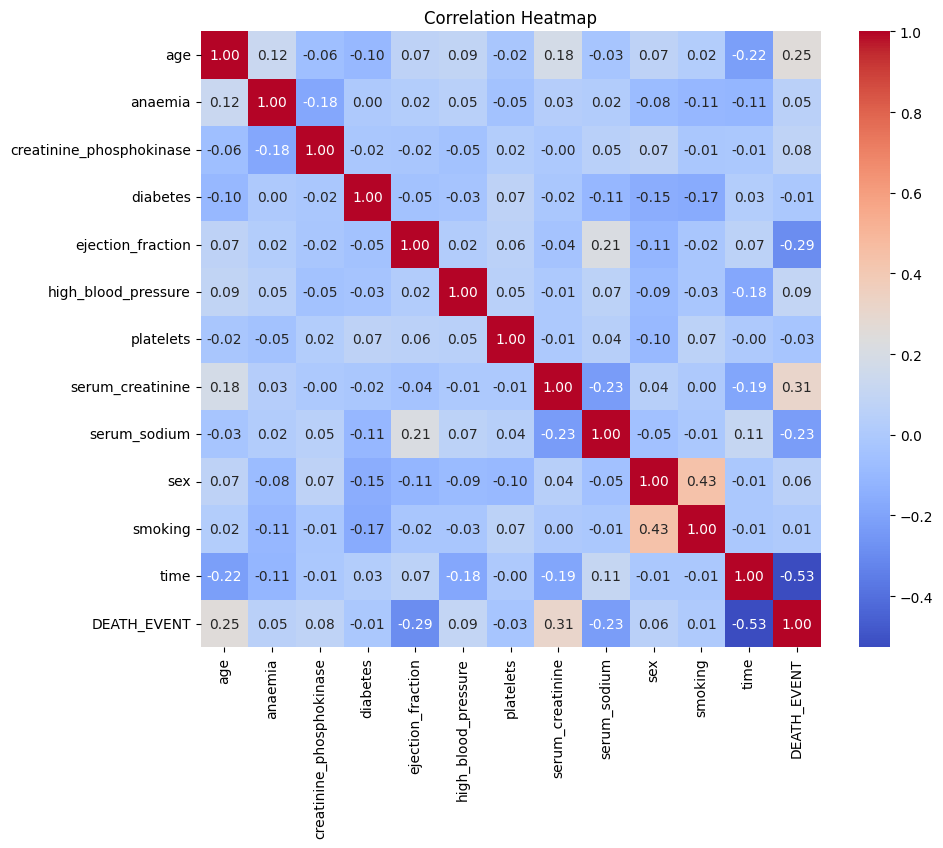

<Figure size 640x480 with 0 Axes>

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


### Identify top correlated features

In [10]:
corr = df.corr().abs()          # absolute value of correlation
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))  # take upper triangle

top_corr = upper.unstack().sort_values(ascending=False).dropna().head(10)
print(top_corr)

DEATH_EVENT   time                 0.527234
smoking       sex                  0.434621
DEATH_EVENT   serum_creatinine     0.311281
              ejection_fraction    0.292702
              age                  0.249442
serum_sodium  serum_creatinine     0.229683
DEATH_EVENT   serum_sodium         0.227355
time          age                  0.220182
serum_sodium  ejection_fraction    0.212627
time          serum_creatinine     0.190489
dtype: float64


## Pair plot Heart Failure 

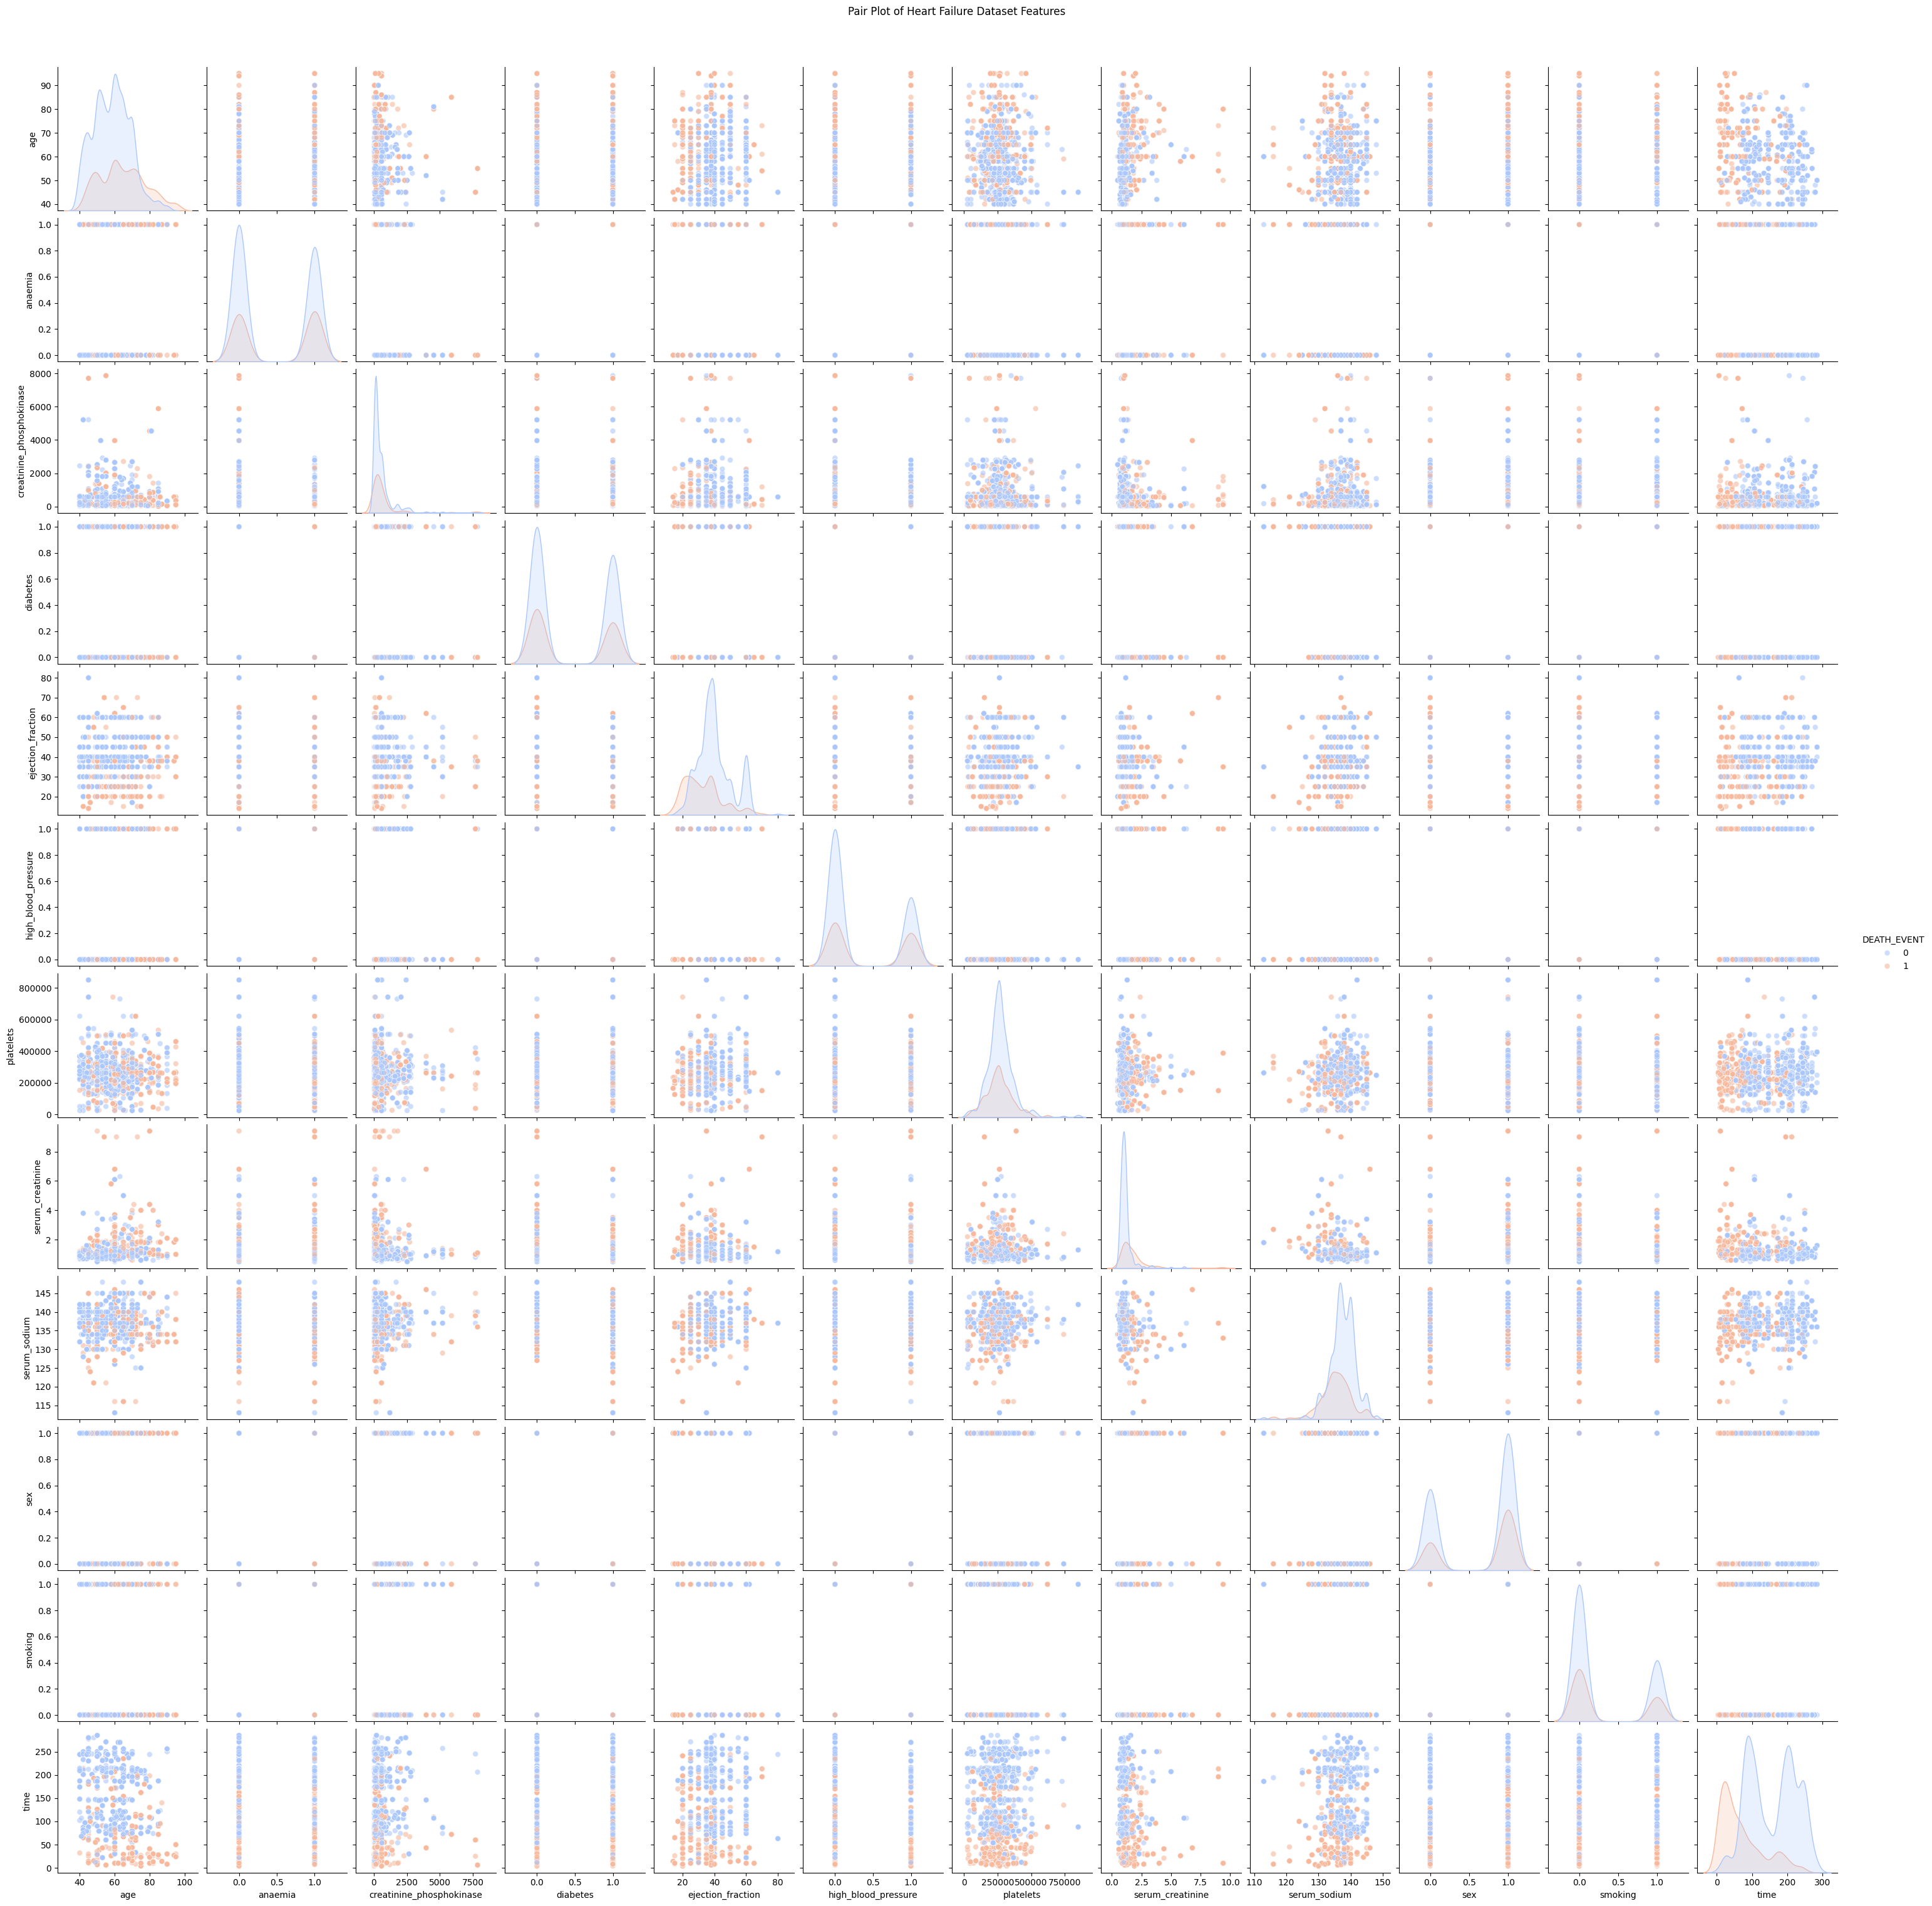

<Figure size 640x480 with 0 Axes>

In [19]:
features = [
    'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
    'ejection_fraction', 'high_blood_pressure', 'platelets',
    'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
    'DEATH_EVENT'
]
df_subset = df[features]
sns.pairplot(
    df_subset,
    hue='DEATH_EVENT',            # color points based on survival (0 or 1)
    diag_kind='kde',              # use KDE for smoother diagonal plots
    palette='coolwarm',           # red-blue color palette
    plot_kws={'alpha': 0.6, 's': 40}  # transparency & point size
)
plt.suptitle('Pair Plot of Heart Failure Dataset Features', y=1.02)
plt.show()
plt.savefig("pair_plot_heart_failure.png")

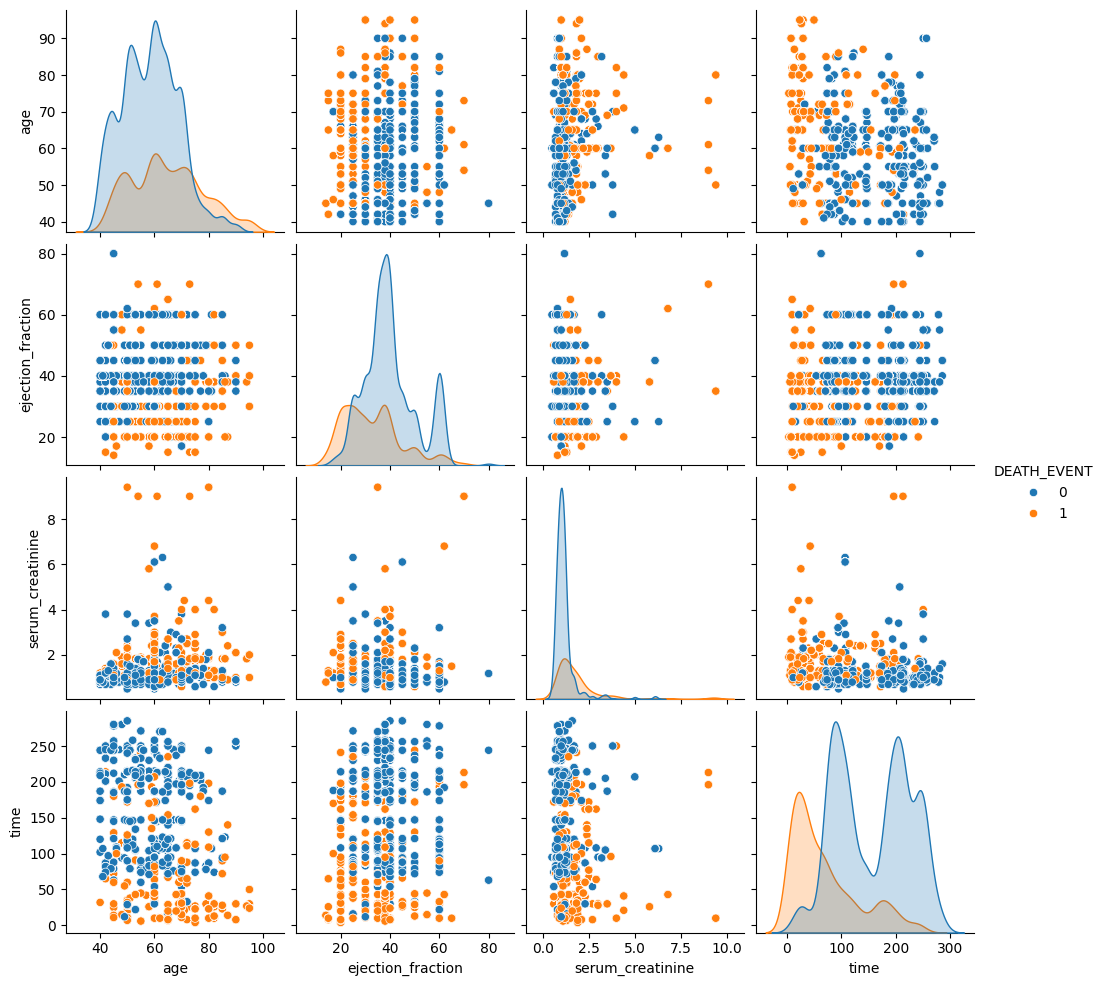

In [21]:
sns.pairplot(df[['age', 'ejection_fraction', 'serum_creatinine', 'time', 'DEATH_EVENT']], hue='DEATH_EVENT')
plt.savefig("pair_plot_heart_failure_top.png")

## Distribution pllot 

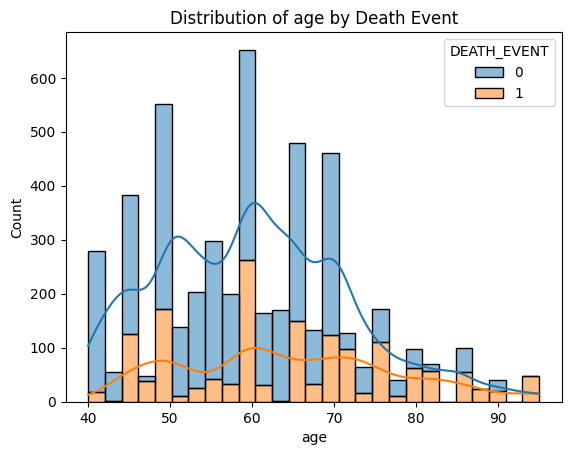

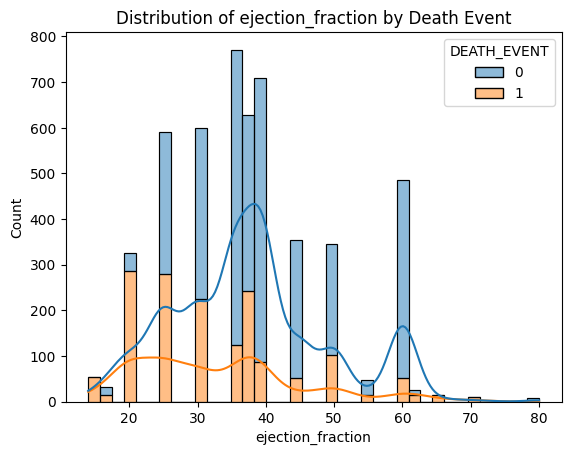

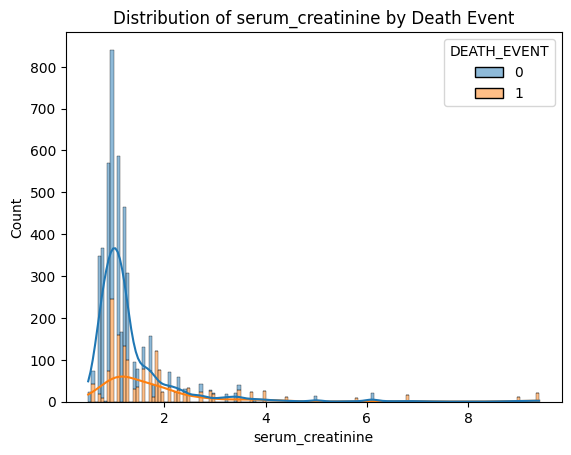

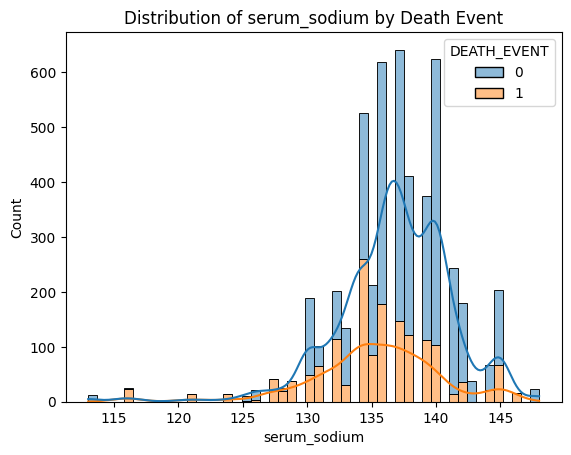

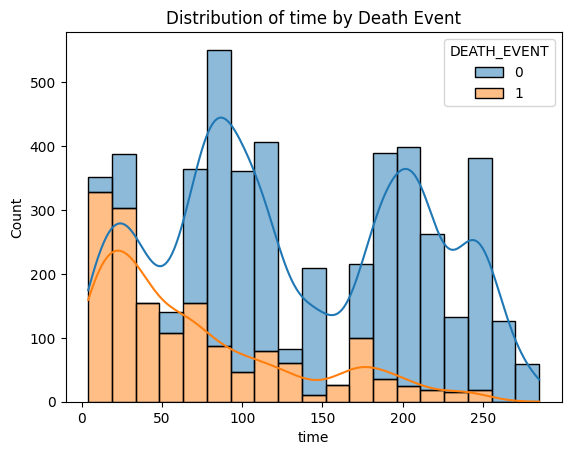

In [13]:
features = ['age','ejection_fraction','serum_creatinine','serum_sodium','time']
for f in features:
    sns.histplot(df, x=f, hue="DEATH_EVENT", kde=True, multiple="stack")
    plt.title(f"Distribution of {f} by Death Event")
    plt.show()

From the above distribution plot we can see that 

    * Age: Older patients more likely to die
    
    * Ejection Fraction: Lower EF strongly linked to death
    
    * Serum Creatinine: Higher creatinine → higher risk
    
    * Time: Shorter follow-up (fewer days) → early deaths

## CAtegorical feature analysis 


 anaemia:
  DEATH_EVENT          0          1
anaemia                          
0            71.042618  28.957382
1            65.978078  34.021922


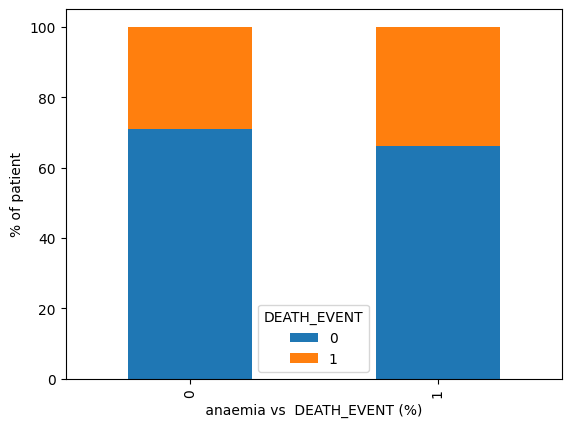


 diabetes:
  DEATH_EVENT          0          1
diabetes                         
0            68.176953  31.823047
1            69.230769  30.769231


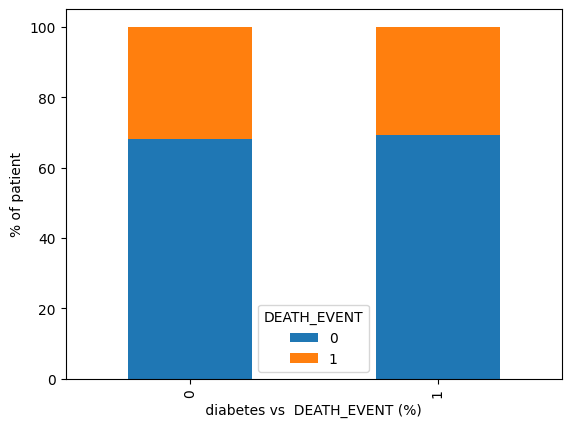


 high_blood_pressure:
  DEATH_EVENT                  0          1
high_blood_pressure                      
0                    71.945844  28.054156
1                    62.883772  37.116228


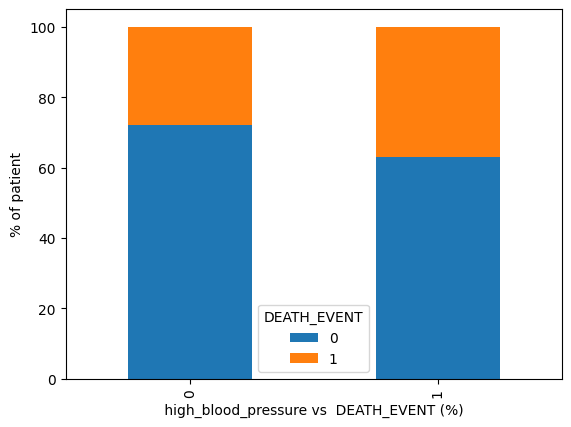


 sex:
  DEATH_EVENT          0          1
sex                              
0            72.121896  27.878104
1            66.728625  33.271375


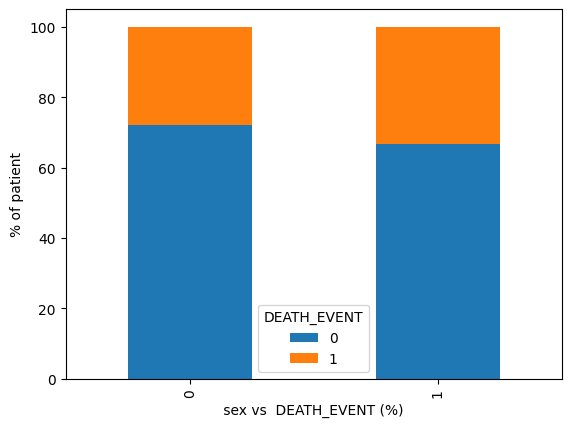


 smoking:
  DEATH_EVENT          0          1
smoking                          
0            68.933450  31.066550
1            67.992303  32.007697


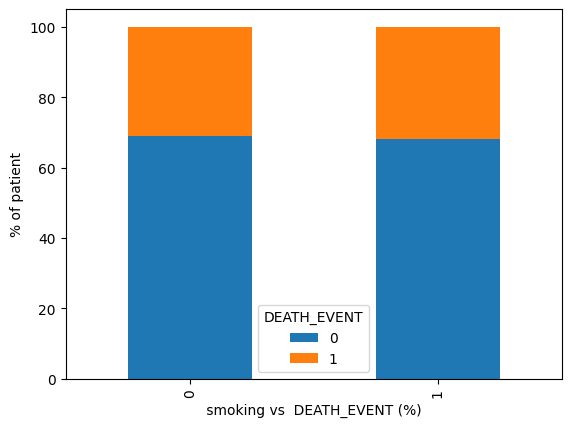

In [14]:
categ_feature = [ 'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking' ] 

for n in categ_feature: 
    ct = pd.crosstab(df[n],df['DEATH_EVENT'],normalize='index')*100 
    print(f"\n {n}:\n ", ct)
    ct.plot(kind='bar', stacked=True)
    plt.ylabel('% of patient')
    plt.xlabel(f" {n} vs  DEATH_EVENT (%) ")
    plt.show()





#### From the above categorical feature analysis observed below points 
    * Anaemia: Slightly higher death rate
    
    * Diabetes / High BP: Small effect
    
    * Sex: Similar between male/female
    
    * Smoking: No strong difference in this dataset

## Feature correlation with Target 

In [15]:
corr_with_target = df.corr()['DEATH_EVENT'].sort_values(ascending=False)
print(corr_with_target)


DEATH_EVENT                 1.000000
serum_creatinine            0.311281
age                         0.249442
high_blood_pressure         0.094023
creatinine_phosphokinase    0.079706
sex                         0.055604
anaemia                     0.054508
smoking                     0.009397
diabetes                   -0.011273
platelets                  -0.031521
serum_sodium               -0.227355
ejection_fraction          -0.292702
time                       -0.527234
Name: DEATH_EVENT, dtype: float64


### Key predictors of death:
Low ejection_fraction, high serum_creatinine, old age, low serum_sodium, and shorter time.

In [17]:
df[['creatinine_phosphokinase','serum_creatinine']].describe()


,creatinine_phosphokinase,serum_creatinine
count,5000.000000,5000.000000
mean,586.760600,1.369106
std,976.733979,1.009750
min,23.000000,0.500000
25%,121.000000,0.900000
50%,248.000000,1.100000
75%,582.000000,1.400000
max,7861.000000,9.400000


## Observation	
    Older age -> higher mortality	Aging hearts less resilient
    Low ejection fraction -> key risk	Direct measure of heart pumping strength
    High serum creatinine -> higher mortality	Indicates kidney dysfunction
    Low serum sodium -> higher mortality	Sign of heart failure severity
    Follow-up time inversely correlated	Death tends to occur earlier for severe cases
    Lifestyle factors (smoking, sex, diabetes)	Weak correlation here